Ising Model Simulation

In [1]:
import jax.numpy as jnp
from jax import random, config
import matplotlib.pyplot as plt
import matplotlib

import IsingModel as IM # import class
from isingfunctions import validate_input

config.update("jax_enable_x64", True)

matplotlib.use('TKAgg')

In [2]:
# system parameters, as fixed by user
n = 25           # number of sites given by n x n (square)
T = 1           # temperature
nstep = 5000    # the 'time' for this dynamical evolution
seed = 0        # random initialisation generator
dynamics = 'G'  # G : Glauber , K : Kawasaki

# validating the dynamics input
try:
    print(validate_input(dynamics))
except ValueError as e:
    print(e)

# initialise lattice sites
key = random.PRNGKey(seed)
lattice = random.choice(key, jnp.array([-1,1]), (n,n))

system = IM.IsingLattice(lattice)             # initial system
energy_lattice = system.return_energy_total() # initial lattice energy

#print(system.lattice, energy_lattice)

Value 'G' is valid.


In [3]:
# Glauber Markov Chain, based on matrix elements not x-y coordinates!
energy_list = []
magnetisation_list = []
time_list = []
print('energy')

if dynamics == 'G':
    for i in range(nstep):
        seed = i 
        key = random.PRNGKey(seed)
        metro_bool, metro_lattice, delta_E = system.perform_glauber_metropolis_test(T,key)

        if metro_bool == True:
            system = IM.IsingLattice(metro_lattice)
            energy_lattice += delta_E

        #occasionally plot or update measurements
        if (i%10) == 0:
            # update measurements
            print(f'{energy_lattice}')
            energy_list.append(energy_lattice)
            magnetisation_list.append(system.return_magnetisation())
            time_list.append(i)
            
            # show animation
            plt.cla()
            im=plt.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
            plt.draw()
            plt.pause(0.0001)

if dynamics == 'K':
    for i in range(nstep):
        seed = i 
        key = random.PRNGKey(seed)
        metro_bool, metro_lattice, delta_E = system.perform_kawasaki_metropolis_test(T,key)

        if metro_bool == True:
            system = IM.IsingLattice(metro_lattice)
            energy_lattice += delta_E

        #occasionally plot or update measurements
        if (i%10) == 0:
            # update measurements
            print(f'{energy_lattice}')
            energy_list.append(energy_lattice)
            magnetisation_list.append(system.return_magnetisation())
            time_list.append(i)
            
            # show animation
            plt.cla()
            im=plt.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
            plt.draw()
            plt.pause(0.0001)
        
plt.close()

energy
-30
-38
-50
-78
-90
-114
-122


2025-01-19 19:12:44.892 python[37422:11440536] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-19 19:12:44.892 python[37422:11440536] +[IMKInputSession subclass]: chose IMKInputSession_Modern


-134
-134
-146
-158
-166
-178
-206
-222
-222
-226
-234
-246
-254
-266
-270
-286
-290
-298
-310
-310
-318
-318
-318
-322
-338
-346
-354
-354
-358
-362
-362
-370
-378
-378
-378
-386
-390
-390
-390
-398
-402
-406
-406
-410
-418
-422
-422
-422
-430
-434
-434
-442
-450
-454
-466
-474
-478
-482
-494
-494
-498
-498
-498
-502
-502
-518
-522
-522
-538
-546
-542
-550
-558
-562
-566
-574
-578
-586
-594
-602
-602
-610
-614
-614
-614
-614
-618
-626
-630
-630
-630
-630
-630
-630
-630
-630
-634
-634
-634
-634
-634
-634
-634
-642
-642
-646
-650
-658
-658
-658
-662
-662
-662
-662
-666
-670
-670
-670
-670
-674
-678
-678
-678
-678
-682
-686
-690
-694
-694
-694
-694
-694
-698
-698
-698
-702
-710
-710
-714
-714
-714
-714
-718
-718
-718
-718
-726
-734
-742
-742
-742
-742
-750
-754
-754
-754
-758
-758
-758
-758
-758
-762
-766
-766
-762
-762
-766
-770
-782
-782
-782
-782
-782
-778
-778
-778
-778
-786
-794
-794
-794
-794
-798
-798
-798
-802
-798
-798
-806
-814
-814
-814
-814
-814
-814
-818
-826
-834
-842
-842


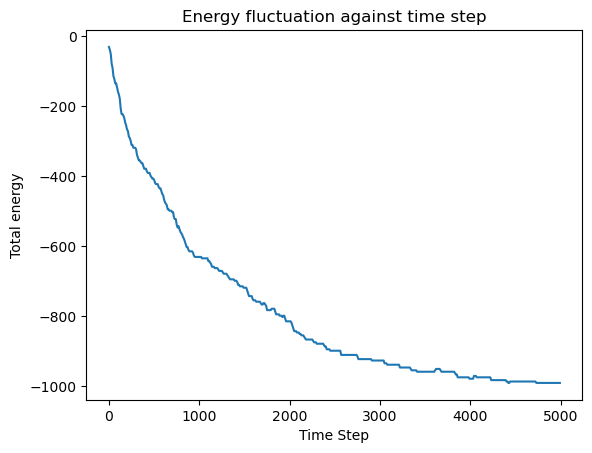

In [4]:
%matplotlib inline
plt.plot(time_list, energy_list)
plt.xlabel('Time Step')
plt.ylabel('Total energy')
plt.title('Energy fluctuation against time step')
plt.show()

In [5]:
data = {
    "time": jnp.array(time_list),
    "total energy": jnp.array(energy_list),
    "magnetisation": jnp.array(magnetisation_list)
}
jnp.save('energy_time', data)
#np.save('energy_time', np.array([time_list, energy_list, magnetisation_list]))

In [6]:
data_array = jnp.load('energy_time.npy', allow_pickle=True)
data_array

array({'time': Array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090,
       1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200,
       1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310,
       1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420,
       1430, 1440, 1450, 1460, 1470,

In [7]:
data_item = data_array.item()
print(f'observables : {data_item.keys()}')
print(f'total energy : {data_item['total energy']}')

observables : dict_keys(['time', 'total energy', 'magnetisation'])
total energy : [ -30  -38  -50  -78  -90 -114 -122 -134 -134 -146 -158 -166 -178 -206
 -222 -222 -226 -234 -246 -254 -266 -270 -286 -290 -298 -310 -310 -318
 -318 -318 -322 -338 -346 -354 -354 -358 -362 -362 -370 -378 -378 -378
 -386 -390 -390 -390 -398 -402 -406 -406 -410 -418 -422 -422 -422 -430
 -434 -434 -442 -450 -454 -466 -474 -478 -482 -494 -494 -498 -498 -498
 -502 -502 -518 -522 -522 -538 -546 -542 -550 -558 -562 -566 -574 -578
 -586 -594 -602 -602 -610 -614 -614 -614 -614 -618 -626 -630 -630 -630
 -630 -630 -630 -630 -630 -634 -634 -634 -634 -634 -634 -634 -642 -642
 -646 -650 -658 -658 -658 -662 -662 -662 -662 -666 -670 -670 -670 -670
 -674 -678 -678 -678 -678 -682 -686 -690 -694 -694 -694 -694 -694 -698
 -698 -698 -702 -710 -710 -714 -714 -714 -714 -718 -718 -718 -718 -726
 -734 -742 -742 -742 -742 -750 -754 -754 -754 -758 -758 -758 -758 -758
 -762 -766 -766 -762 -762 -766 -770 -782 -782 -782 -782 -782 -778 